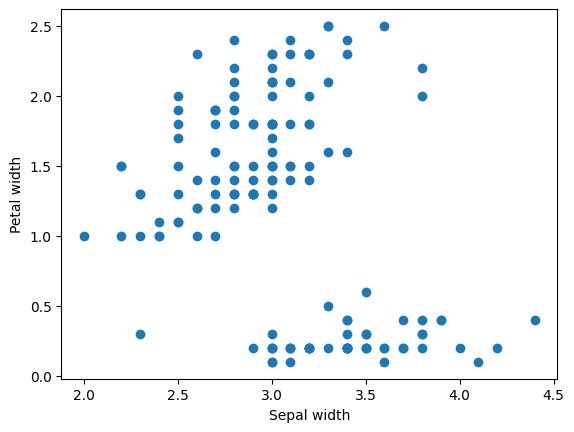

In [5]:
# https://medium.com/towards-data-science/opening-the-black-box-of-clustering-kmeans-e970062ff415

import numpy as np
from sklearn import datasets, cluster
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
x = iris.data[:, [1,3]] # takes the 2nd and 4th column of the data
plt.scatter(x[:,0], x[:,1])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.show()

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


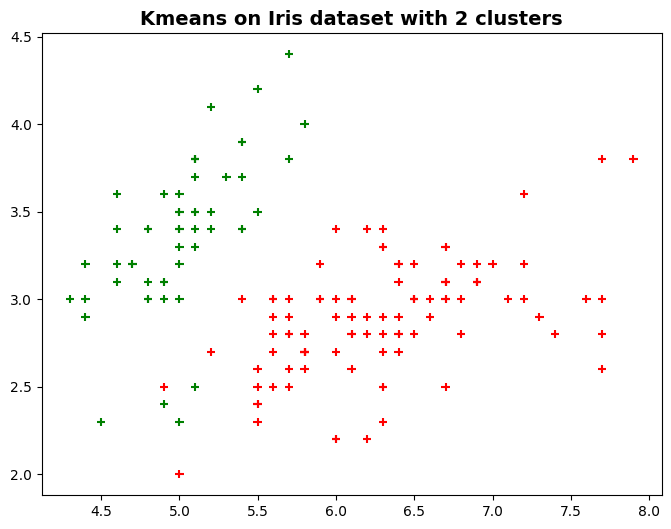

In [6]:
from sklearn.cluster import KMeans
x_fit = iris.data # Note that in we use all 4 columns here
random_state = 2020
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=random_state)
kmeans.fit_transform(x_fit)
label = kmeans.labels_
color = ['red','green','blue']
plt.figure(figsize=(8, 6))
plt.scatter(x_fit[:,0], x_fit[:,1], c=[color[i] for i in label], marker='+')
plt.title('Kmeans on Iris dataset with 2 clusters', fontweight='bold', fontsize=14)
plt.show()

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

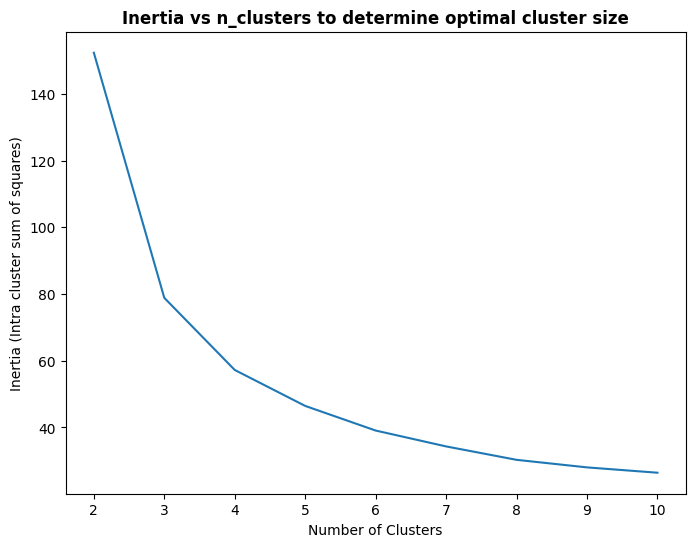

In [7]:
elbow = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x_fit)
    elbow.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,11), elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Intra cluster sum of squares)')
plt.title('Inertia vs n_clusters to determine optimal cluster size', fontweight='bold')
plt.show()

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

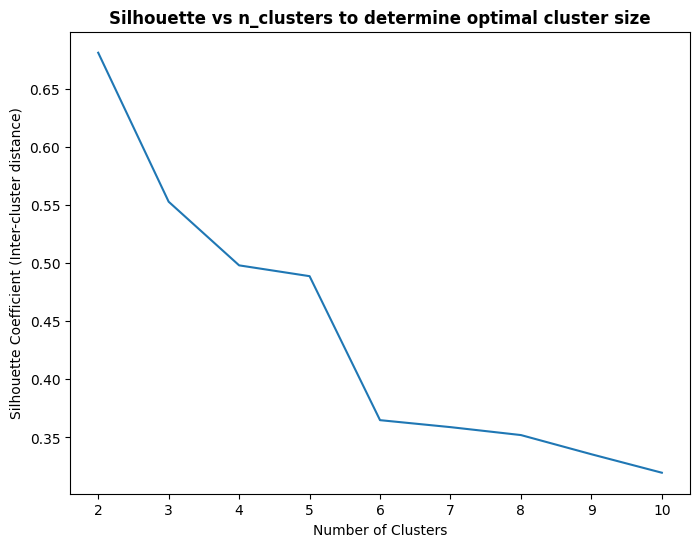

In [8]:
from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x_fit)
    labels = kmeans.labels_
    sil.append(silhouette_score(x_fit, labels, metric = 'euclidean'))
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,11), sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient (Inter-cluster distance)')
plt.title('Silhouette vs n_clusters to determine optimal cluster size', fontweight='bold')
plt.show()

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


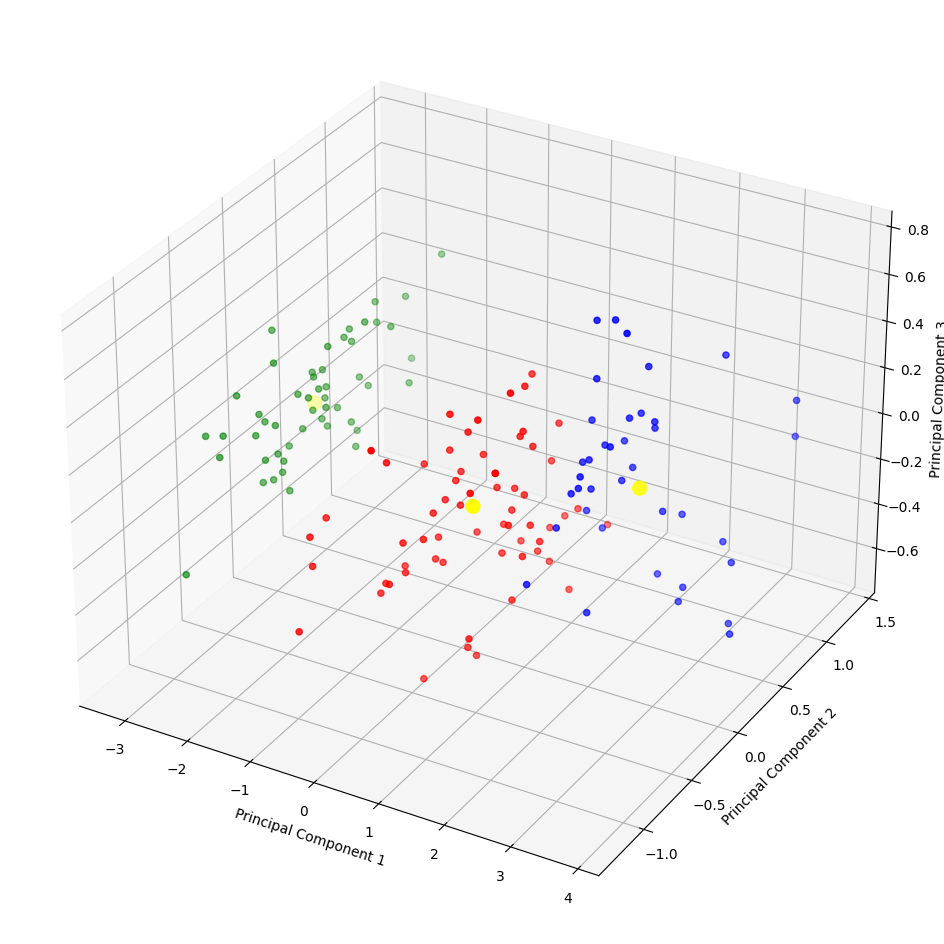

In [9]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
x_full = iris.data
pca = decomposition.PCA()
xr = pca.fit_transform(x_full)
kmeans = cluster.KMeans(n_clusters=3, init='k-means++', random_state=random_state)
kmeans.fit(xr)
label = kmeans.labels_
color = ['red', 'green', 'blue']
plt.figure(figsize=(12, 12))
fig = plt.subplot(1, 1, 1, projection='3d')
fig.scatter(xr[:,0], xr[:,1], xr[:,2], c=[color[i] for i in label])
fig.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=100)
fig.set_xlabel('Principal Component 1')
fig.set_ylabel('Principal Component 2')
fig.set_zlabel('Principal Component 3')
plt.show()